In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def visualize_accuracies(df):
    df[['acc@1', 'acc@2', 'acc@3']].plot(kind='hist', alpha=0.5, bins=30)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of acc@1, acc@2, acc@3')
    plt.legend(['acc@1', 'acc@2', 'acc@3'])
    plt.show()

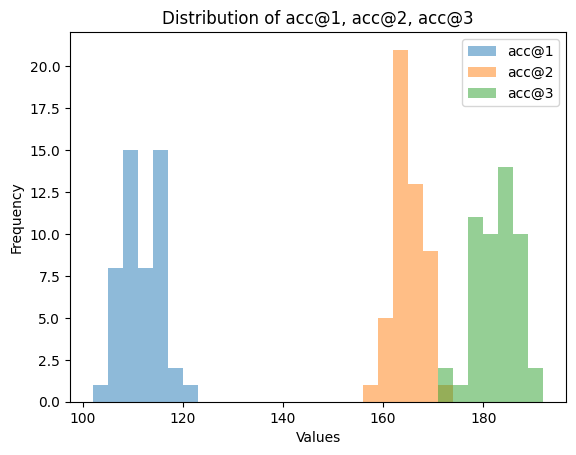

In [7]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv'))

In [6]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv')['acc@1'].describe()

count     50.000000
mean     111.340000
std        3.910269
min      102.000000
25%      108.000000
50%      111.000000
75%      114.750000
max      122.000000
Name: acc@1, dtype: float64

In [10]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv')['acc@1'].describe()

count     50.000000
mean     102.180000
std        5.826365
min       88.000000
25%       97.500000
50%      102.000000
75%      105.000000
max      114.000000
Name: acc@1, dtype: float64

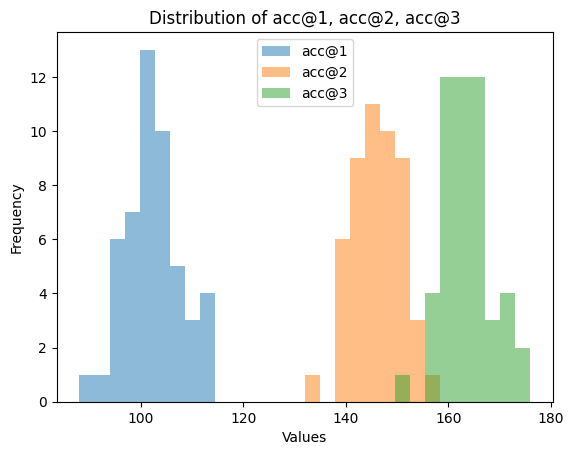

In [6]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv'))